In [79]:
#for the dataset i went on https://finance.yahoo.com/lookup
import pandas as pd

df = pd.read_csv('DD.csv')
df
#Almost 5000 entries in our dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,0.000000,7.294257,7.254722,7.274490,1.102052,74617
1,1972-06-02,7.294257,7.393096,7.294257,7.353560,1.114030,227645
2,1972-06-05,7.353560,7.363444,7.333793,7.333793,1.111036,96117
3,1972-06-06,7.333793,7.343677,7.294257,7.314025,1.108041,77146
4,1972-06-07,7.284374,7.284374,7.185535,7.185535,1.088576,121411
...,...,...,...,...,...,...,...
13005,2023-12-28,76.870003,77.410004,76.809998,77.040001,77.040001,1858300
13006,2023-12-29,76.849998,77.120003,76.540001,76.930000,76.930000,1722800
13007,2024-01-02,76.489998,77.739998,76.489998,77.510002,77.510002,2570000
13008,2024-01-03,76.940002,77.540001,76.320000,77.019997,77.019997,2886900


In [80]:
#We are only interested in two columns: Date and Close
#We can use Open instead of Close it doesnt really matter
df = df[['Date','Close']]
df

,Date,Close
0,1972-06-01,7.274490
1,1972-06-02,7.353560
2,1972-06-05,7.333793
3,1972-06-06,7.314025
4,1972-06-07,7.185535
...,...,...
13005,2023-12-28,77.040001
13006,2023-12-29,76.930000
13007,2024-01-02,77.510002
13008,2024-01-03,77.019997


In [81]:
df['Date']

0        1972-06-01
1        1972-06-02
2        1972-06-05
3        1972-06-06
4        1972-06-07
            ...    
13005    2023-12-28
13006    2023-12-29
13007    2024-01-02
13008    2024-01-03
13009    2024-01-04
Name: Date, Length: 13010, dtype: object

In [82]:
#notice date is an object we want it to be an actual date

import datetime

def obj_to_datetime(s):
    split= s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year = year, month = month, day = day)

#Split the date into 3 seperate parts by the hyphen, changed each of those parts into integer
#called them year month and day and returned them as a datetime object

df['Date']= df['Date'].apply(obj_to_datetime)

#we passed the function to the date column in our dataframe

df['Date']

#Notice now the type is now datetime64 not object

<ipython-input-82-1673a5a08b8e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']= df['Date'].apply(obj_to_datetime)


0       1972-06-01
1       1972-06-02
2       1972-06-05
3       1972-06-06
4       1972-06-07
           ...    
13005   2023-12-28
13006   2023-12-29
13007   2024-01-02
13008   2024-01-03
13009   2024-01-04
Name: Date, Length: 13010, dtype: datetime64[ns]

In [83]:
#We want to get rid of our index and have the date be the index instead
df.index= df.pop('Date')
df

,Close
Date,
1972-06-01,7.274490
1972-06-02,7.353560
1972-06-05,7.333793
1972-06-06,7.314025
1972-06-07,7.185535
...,...
2023-12-28,77.040001
2023-12-29,76.930000
2024-01-02,77.510002


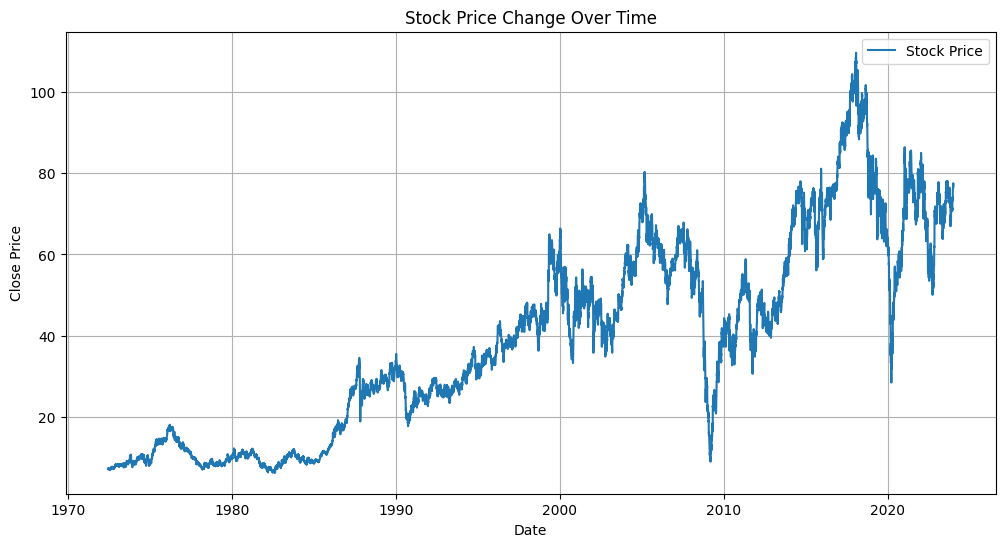

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Stock Price')
plt.title('Stock Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
import numpy as np


m=3 #This is our window size

def df_to_windowed_df(dataframe, first_date, last_date, n=3):


    # Initialize the target date with the first date
    target_date = first_date

    # Lists to store data for the windowed dataset
    dates = []
    X, Y = [], []

    # Flag to indicate if the last window has been processed
    last_time = False

    # Main loop to create the windowed dataset
    while True:
        # Subset the DataFrame up to the target date with the last n+1 rows
        df_subset = dataframe.loc[:target_date].tail(n + 1)

        # Check if the subset has exactly n+1 rows; if not, print an error message and return
        if len(df_subset) != n + 1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        # Extract the 'Close' column values from the subset into an array
        values = df_subset['Close'].to_numpy()

        # Create the input features (x) using the first n values and the target value (y) using the last value
        x, y = values[:-1], values[-1]

        # Append target date, x, and y to the lists
        dates.append(target_date)
        X.append(x)
        Y.append(y)

        # Calculate the next target date by adding 7 days to the current target date
        next_week = dataframe.loc[target_date:target_date + datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        # Check if it's the last iteration
        if last_time:
            break

        # Update the target date
        target_date = next_date

        # Check if the last date is reached to terminate the loop
        if target_date == last_date:
            last_time = True

    # Create a DataFrame to store the windowed dataset
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    # Convert X to a NumPy array
    X = np.array(X)

    # Populate the DataFrame with input features (Target-n) and target values (Target)
    for i in range(0, n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df



windowed_df = df_to_windowed_df(df,
                                df.index[m],
                                df.index.max(),
                                n=m)
windowed_df

#I am trying to make this notebook applicable for any dataset we load into it from yahoo finance, so if we need a bigger window size
#We just change m= any number and change df.index[m] where m is defined previously it can be 3 or 4 or whatever

,Target Date,Target-3,Target-2,Target-1,Target
0,1972-06-06,7.274490,7.353560,7.333793,7.314025
1,1972-06-07,7.353560,7.333793,7.314025,7.185535
2,1972-06-08,7.333793,7.314025,7.185535,7.116349
3,1972-06-09,7.314025,7.185535,7.116349,7.076813
4,1972-06-12,7.185535,7.116349,7.076813,7.116349
...,...,...,...,...,...
13002,2023-12-28,75.529999,76.510002,76.930000,77.040001
13003,2023-12-29,76.510002,76.930000,77.040001,76.930000
13004,2024-01-02,76.930000,77.040001,76.930000,77.510002
13005,2024-01-03,77.040001,76.930000,77.510002,77.019997


In [86]:
#As you can see above, all this function did was copy our data frame into a windowed data frame
#the three extra columns are the stock closing values for the days before
#so for 2004-08-27, Target -1 is the close value for the day before
#target -2 is the close value for two days before
#and target -3 is the close value for three days before
#Note we can change the the window n to be different than 3
#The close value for a day is renamed to target because we are going to feed this into a supervised learning model
#So think of Target1,2,3 as inputs and the target as an output for the model


#Now we want another function that changes the above windowed data frame into a numpy array
#The numpy array can be fed into a model

def windowed_df_to_date_X_y(windowed_dataframe):

    #Changed the dataframe into a numpy array
    df_as_np= windowed_dataframe.to_numpy()

    #dates are all the rows and the 0th (1st) column
    dates = df_as_np[:,0]

    #Now we want the input matrix, we need a few steps for that since it is going to be a 3d tensor
    #So middle matrix takes all the rows, the 1st (2nd) column and the column before the last
    middle_matrix = df_as_np[:,1:-1]


    #Nowe we reshape to get the 3D tensor
    X = middle_matrix.reshape((len(dates),middle_matrix.shape[1], 1))
    #the first dimension is the length of dates so its basically how many entries or observations we have
    #the second dimension is the number of columns we have so basically n or m from the previous function
    #the third dimension is 1 as you can see, because we are basically working with one variable, we have different
    #outputs of the variable and we observe how it changes through time, but it is only one variable
    #If you remember at the beginning we had more variables like Open, High, Low, etc... If we were to use these
    #We would have the last dimension as something greater than 1 depending on how many variables we are working with

    y = df_as_np[:,-1]
    #y is the output so its the last column only

    return dates, X.astype(np.float32), y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((13007,), (13007, 3, 1), (13007,))

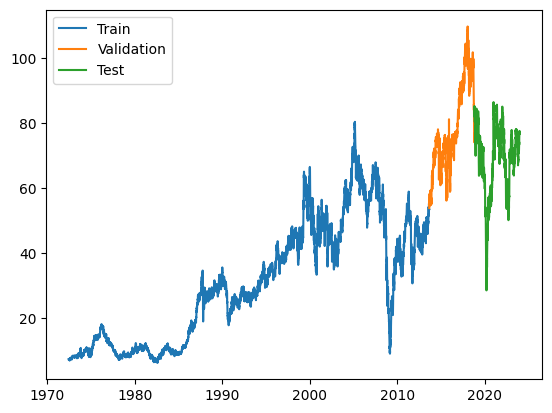

In [87]:
#We are splitting our data into three sets: Training, Validation, and Testing.

# Calculate the indices corresponding to the 80% and 90% quantiles
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

# Split the dataset into training, validation, and test sets


dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
#So the first 80 percent of our data is going to be used for trainings

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
#The next 10 percent are for validation (from .8 to .9)

dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]
#the last 10 percent are for testing (from .9 to 1)

# Plotting to visualize
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

# Adding legend to the plot
plt.legend(['Train', 'Validation', 'Test'])


In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
#we are going to be making a sequential model with many layers


from tensorflow.keras.optimizers import Adam
#adam is an optimizer

#Now to build the model



model = Sequential([layers.Input((m, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dropout(0.5),
                    layers.Dense(32, activation='relu'),
                    layers.Dropout(0.3),
                    layers.Dense(1)])


#m and 1 are the dimensions, we are going m days in the past and we are working with 1 variable only
#LSTM is a type of recurrent neural network (RNN) layer that is suitable for processing sequences.
#in the LSTM layer 64 is the number of neurons, we can use more but the model will become more complex
#which may lead to overfitting and also might not break my laptop
#Same thing for the dense layer
#a dense layer, also known as a fully connected layer, is a type of layer where each neuron or node in
#the layer is connected to every neuron in the previous layer and every neuron in the next layer
#the purpose of a dense layer is to learn a mapping from the input data to the output data through the adjustment of weights and biases.
#Relu stands for Rectified Linear Unit, and it is an activation function commonly used in neural networks, especially in deep learning models.
#it allows positive values to pass through unchanged while setting negative values to zero.
#Dropout layers drop out values at random to help with overfitting
#The last dense layer is basically the output so it should just have one neuron. We are predicting a single output.

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])
#Configuring the model for training, we set the loss function to MSE (Mean squared error)
#Set the optimizer to the one we imported above with a learning rate of 0.001, this is arbitrary and can be changed depending on the scenario
#metrics specifies metrics to be tracked during training. here, Mean Absolute Error (MAE) is used as a metric to evaluate performance and accuracy.

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)
#Here we start training the model.
#Epochs is how many times the model iterates over the training set

Epoch 1/100
326/326 [==============================] - 6s 10ms/step - loss: 268.3498 - mean_absolute_error: 10.6489 - val_loss: 204.9172 - val_mean_absolute_error: 10.9729
Epoch 2/100
326/326 [==============================] - 2s 7ms/step - loss: 83.1388 - mean_absolute_error: 6.3036 - val_loss: 204.2436 - val_mean_absolute_error: 11.7633
Epoch 3/100
326/326 [==============================] - 2s 6ms/step - loss: 77.4511 - mean_absolute_error: 6.0353 - val_loss: 165.3405 - val_mean_absolute_error: 9.9832
Epoch 4/100
326/326 [==============================] - 2s 6ms/step - loss: 71.0066 - mean_absolute_error: 5.7268 - val_loss: 196.4961 - val_mean_absolute_error: 12.7744
Epoch 5/100
326/326 [==============================] - 2s 6ms/step - loss: 68.6583 - mean_absolute_error: 5.5792 - val_loss: 129.4098 - val_mean_absolute_error: 8.7988
Epoch 6/100
326/326 [==============================] - 2s 5ms/step - loss: 64.8606 - mean_absolute_error: 5.4137 - val_loss: 159.2444 - val_mean_absolute_

326/326 [==============================] - 1s 2ms/step


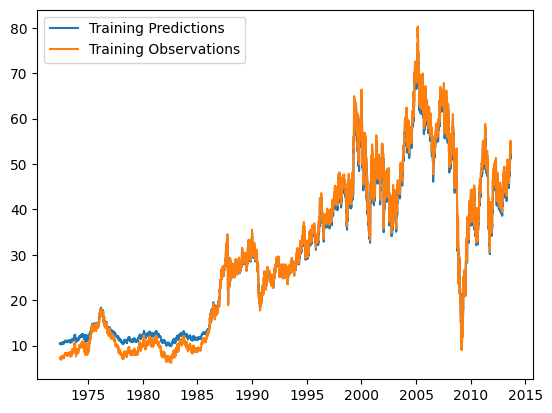

In [89]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

41/41 [==============================] - 0s 2ms/step


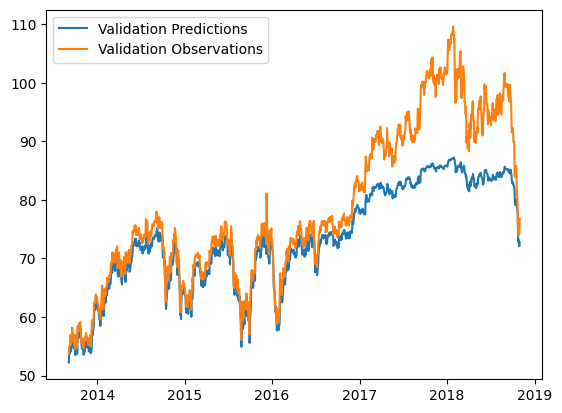

In [90]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

41/41 [==============================] - 0s 2ms/step


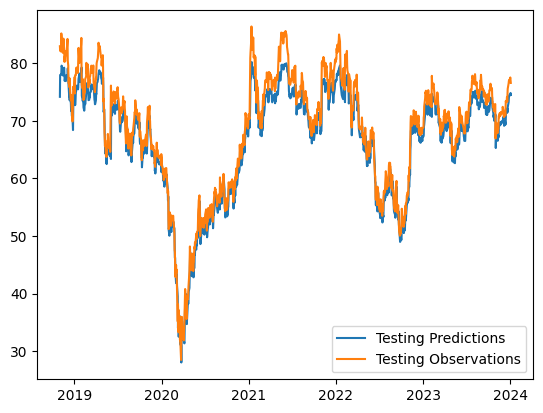

In [91]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

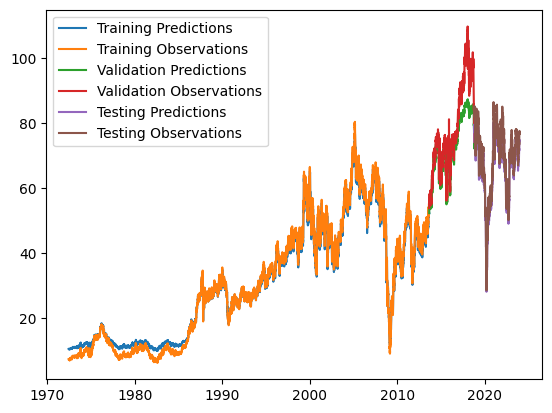

In [92]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [93]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Function to calculate R-squared, RMSE, and MAE
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return r2, rmse, mae


val_predictions = model.predict(X_val)
r2_val, rmse_val, mae_val = evaluate_model(y_val, val_predictions)


test_predictions = model.predict(X_test)
r2_test, rmse_test, mae_test = evaluate_model(y_test, test_predictions)

# Print or use the evaluation metrics
print(f'Validation R2: {r2_val:.4f}, RMSE: {rmse_val:.4f}, MAE: {mae_val:.4f}')
print(f'Test R2: {r2_test:.4f}, RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}')

'''
R-squared (R2):

Definition: R2 measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
Interpretation:
Range: 0 to 1.
High Value is Desirable: A higher R2 indicates that a larger proportion of the variance in the target variable is explained by the model.
A value of 1 implies a perfect fit, while 0 indicates that the model does not explain any variability.




Root Mean Squared Error (RMSE):

Definition: RMSE provides an estimate of the average magnitude of the errors between predicted and observed values.
Interpretation:
Low Value is Desirable: Lower RMSE values indicate that the model's predictions are closer to the actual values.
The RMSE is in the same units as the target variable, making it easier to interpret.



Mean Absolute Error (MAE):

Definition: MAE is the average absolute difference between predicted and observed values.
Interpretation:
Low Value is Desirable: Like RMSE, lower MAE values suggest that the model's predictions are, on average,
closer to the actual values. MAE is less sensitive to outliers compared to RMSE.
'''


41/41 [==============================] - 0s 4ms/step
Validation R2: 0.7106, RMSE: 7.2023, MAE: 5.0768
Test R2: 0.9444, RMSE: 2.4863, MAE: 2.0614


"\nR-squared (R2):\n\nDefinition: R2 measures the proportion of the variance in the dependent variable that is predictable from the independent variables.\nInterpretation:\nRange: 0 to 1.\nHigh Value is Desirable: A higher R2 indicates that a larger proportion of the variance in the target variable is explained by the model.\nA value of 1 implies a perfect fit, while 0 indicates that the model does not explain any variability.\n\n\n\n\nRoot Mean Squared Error (RMSE):\n\nDefinition: RMSE provides an estimate of the average magnitude of the errors between predicted and observed values.\nInterpretation:\nLow Value is Desirable: Lower RMSE values indicate that the model's predictions are closer to the actual values.\nThe RMSE is in the same units as the target variable, making it easier to interpret.\n\n\n\nMean Absolute Error (MAE):\n\nDefinition: MAE is the average absolute difference between predicted and observed values.\nInterpretation:\nLow Value is Desirable: Like RMSE, lower MAE va

In [98]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

# Set the maximum number of iterations
max_iterations = 50

# Counter variable
iteration_count = 0

for target_date in recursive_dates:
    if iteration_count >= max_iterations:
        break  # Exit the loop if the maximum number of iterations is reached

    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction
    print(f'Prediction for {target_date}: {next_prediction}')

    # Increment the iteration count
    iteration_count += 1


1/1 [==============================] - 0s 67ms/step
Prediction for 2013-09-04 00:00:00: [52.15528]
1/1 [==============================] - 0s 37ms/step
Prediction for 2013-09-05 00:00:00: [52.15528]
1/1 [==============================] - 0s 108ms/step
Prediction for 2013-09-06 00:00:00: [52.15528]
1/1 [==============================] - 0s 37ms/step
Prediction for 2013-09-09 00:00:00: [52.15528]
1/1 [==============================] - 0s 138ms/step
Prediction for 2013-09-10 00:00:00: [52.15528]
1/1 [==============================] - 0s 218ms/step
Prediction for 2013-09-11 00:00:00: [52.15528]
1/1 [==============================] - 0s 48ms/step
Prediction for 2013-09-12 00:00:00: [52.15528]
1/1 [==============================] - 0s 66ms/step
Prediction for 2013-09-13 00:00:00: [52.15528]
1/1 [==============================] - 0s 33ms/step
Prediction for 2013-09-16 00:00:00: [52.15528]
1/1 [==============================] - 0s 38ms/step
Prediction for 2013-09-17 00:00:00: [52.15528]
1/1 [==

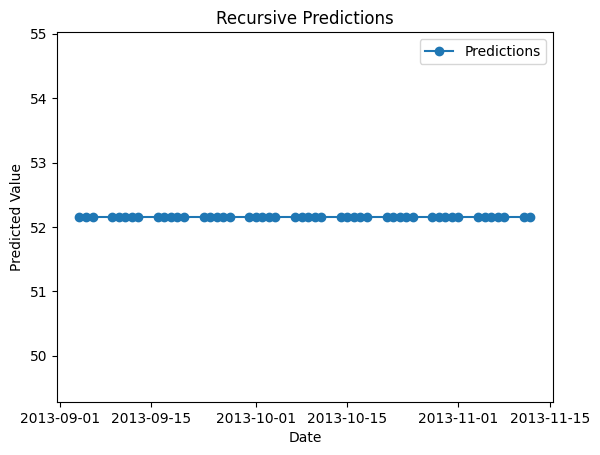

In [97]:
plt.plot(recursive_dates[:max_iterations], recursive_predictions[:max_iterations], marker='o', label='Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('Recursive Predictions')
plt.legend()
plt.show()